<a href="https://colab.research.google.com/github/crftbt/Rust-Map-Procedural-Generation/blob/main/Proc_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import json

In [ ]:
def generate_perlin_noise_2d(shape, res):
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1) 

def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

def distance_squared(x, y, width, height):
    dx = 2 * x / width - 1
    dy = 2 * y / height - 1
    # at this point 0 <= dx <= 1 and 0 <= dy <= 1
    return dx*dx + dy*dy

In [ ]:
noise = generate_perlin_noise_2d((500,500), (1,1))
noise = (noise - noise.min()) / (noise.max() - noise.min())
print(noise)
#imgplot = plt.imshow(noise, cmap='gray',)

[[0.62913872 0.62949401 0.62984853 ... 0.61942402 0.62266211 0.62590037]
 [0.63337952 0.63373481 0.63408932 ... 0.61666276 0.61990083 0.62313909]
 [0.63761955 0.63797484 0.63832935 ... 0.61390159 0.61713966 0.62037791]
 ...
 [0.61953431 0.62233641 0.62513749 ... 0.61767022 0.62190384 0.62613878]
 [0.62273411 0.6255362  0.62833729 ... 0.61725942 0.62149304 0.62572798]
 [0.62593591 0.62873801 0.6315391  ... 0.61684733 0.62108093 0.62531587]]


In [ ]:
def createIsland(array, first, second):
  finalArray = []


  for x in range(len(array)):
    newRow = []
    for y in range(len(array[x])):
      if(array[x][y] > first + second * distance_squared(x,y,500,500)):
        newRow.append(array[x][y])
      else:
        newRow.append(0)
    finalArray.append(newRow)
  return finalArray

#finalArray = createIsland(noise, 0.3, 0.4)
#imgplot = plt.imshow(finalArray, cmap='gray')

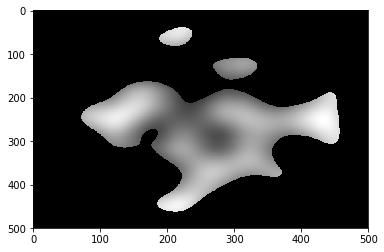

In [ ]:
mapSize = (500, 500)
zoom = (5,5)
paramOne = 0.2
paramTwo = 0.8


noise = generate_perlin_noise_2d(mapSize, zoom)
noise = (noise - noise.min()) / (noise.max() - noise.min())
finalArray = createIsland(noise, paramOne, paramTwo)
imgplot = plt.imshow(finalArray, cmap='gray', aspect='auto')


In [ ]:
newArray = np.empty((500, 500), dtype=object)

def waterCheck(x,y):
  if(x < 0 or y < 0 or x >= 500-1 or y >= 500-1):
    return
    
  if(finalArray[x][y] > 0 and (finalArray[x-1][y] == 0 or finalArray[x][y-1]== 0 or finalArray[x+1][y]== 0 or finalArray[x][y+1]== 0)):
    return True
  else:
    return False

def createSand(x,y,count):
  
  if(x < 0 or y < 0 or x >= 500-1 or y >= 500-1):
    return

  if(count == 0):
    return
  
  newArray[x][y] = "sand"
  if not(newArray[x-1][y] == "sand" or newArray[x-1][y] == "water"):
    createSand(x-1, y, count-1)
    
  if not(newArray[x][y-1] == "sand" or newArray[x][y-1] == "water"):
    createSand(x, y-1, count-1)

  if not(newArray[x+1][y] == "sand" or newArray[x+1][y] == "water"):
    createSand(x+1, y, count-1)

  if not(newArray[x][y+1] == "sand" or newArray[x][y+1] == "water"):
    createSand(x, y+1, count-1)



for x in range(len(finalArray)):
  for y in range(len(finalArray[x])):
    if(finalArray[x][y] == 0):
      newArray[x][y] = "water"
    if(finalArray[x][y] > 0):
      newArray[x][y] = "grass"
    if(waterCheck(x,y)):
      createSand(x,y,random.randint(5, 10))


In [ ]:
json.dumps(newArray.tolist())

'[["water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water", "water"

In [ ]:
colouredMap = []

guide = {
    "None" : (0,0,0),
    "water" : (28,163,236),
    "sand" : (194,178,128),
    "grass" : (44,176,55)
}
for x in range(len(newArray)):
  newRow = []
  for y in range(len(newArray[x])):
    val = guide[str(newArray[x][y])]
    newRow.append(val)
  colouredMap.append(newRow)

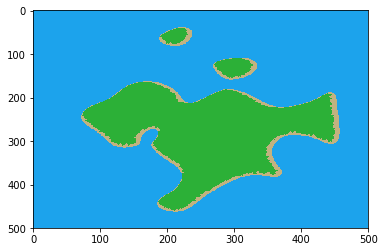

In [ ]:
imgplot = plt.imshow(colouredMap, aspect='auto')